In [1]:
import math 

MODEL_G = 9.81
MODEL_DT = 0.001

class Body:
    def __init__(self, x, y, vx, vy):
        """
        Создать тело.
        
        Пареметры:
        ----------
        x: float
            горизонтальная координата
        y: float
            вертикальная координата
        vx: float
            горизонтальная скорость
        vy: float
            вертикальная скорость
        """

        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        
        self.trajectory_x = []
        self.trajectory_y = []
        

    def advance(self):
        """
        Выполнить шаг мат. модели применительно к телу, предварительно записав его координаты
        """
        self.trajectory_x.append(self.x)
        self.trajectory_y.append(self.y)
        
        self.x += self.vx * MODEL_DT
        self.y += self.vy * MODEL_DT
        self.vy -= MODEL_G * MODEL_DT

In [14]:
class Rocket(Body):
    def __init__(self, x, y, vx, vy):
        """
        Создать ракету.
        
        Пареметры:
        ----------
        x: float
            горизонтальная координата
        y: float
            вертикальная координата
        """
        super().__init__(x, y, 10, 10) # Вызовем конструктор предка — тела, т.к. он для ракеты актуален
        self.m_gas = 5.0
        self.m_rocket = 250.0
        self.dm_gas = 0.01
        self.u_gas = 10.0
      

    def advance(self):
        super().advance() # вызовем метод предка — тела, т.к. и он для ракеты актуален.
        if self.m_rocket >= 0:
            self.y += self.vy * MODEL_DT 
            self.x += self.vx * MODEL_DT
            self.vy += (self.u_gas / MODEL_DT * self.dm_gas / self.m_rocket * self.vy / (self.vx * self.vx + self.vy * self.vy)) - (MODEL_G * MODEL_DT)
            self.vx += self.u_gas / MODEL_DT * self.dm_gas / self.m_rocket * self.vx / (self.vx * self.vx + self.vy * self.vy) 
            self.m_rocket -= self.dm_gas

In [15]:
import numpy as np

b = Body(0, 0, 9, 9)
r = Rocket(0, 0, 9, 9)

bodies = [b, r]
# Дальше мы уже не будем думать, кто тут ёжик, кто ракета, а кто котлета —
# благодаря возможностям ООП будем просто работать со списком тел

for t in np.arange(0, 2, MODEL_DT): # для всех временных отрезков
    for b in bodies: # для всех тел
        b.advance() # выполним шаг

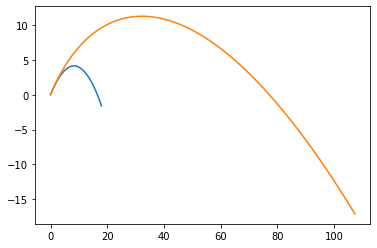

In [16]:
%matplotlib inline
from matplotlib import pyplot as pp

for b in bodies: # для всех тел
    pp.plot(b.trajectory_x, b.trajectory_y) # нарисуем их траектории